In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [2]:
## get species text length
speciesFiles = os.listdir("./WikiSpeciesHabitats/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("./WikiSpeciesHabitats/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomialName"])
        speciesKey.append(fileContent["speciesKey"])
        textLenght.append(fileContent["textLength"])
speciesData = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["speciesKey", "binomialName", "textLenght"])

In [3]:
## get species taxonomy
df = pd.read_json("./WikiSpeciesHabitats/speciesData.json", orient="records")
df = df.drop("scientificName", axis=1).drop_duplicates()
speciesData = df.join(speciesData.set_index("speciesKey"), on="speciesKey", how="inner")
df = None

In [4]:
## get species number of occurences
df = pd.read_json("./processed_data/speciesHabitatsRecords.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["speciesKey"].value_counts())
df.columns=["observationsCount"]
speciesData = speciesData.join(df, on="speciesKey", how="inner")
df = None

In [5]:
speciesData.head()

,kingdom,phylum,class,order,family,genus,species,speciesKey,binomialName,textLenght,observationsCount
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1461
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1294
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1182
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,143
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,118


In [6]:
## Overall text length and obsercations count distributions
speciesData.describe()

,speciesKey,textLenght,observationsCount
count,5.374000e+03,5374.000000,5374.000000
mean,4.037422e+06,4315.757536,37.736323
std,2.250811e+06,8070.556804,82.343695
min,1.012292e+06,79.000000,1.000000
25%,2.492886e+06,769.000000,3.000000
50%,3.046140e+06,2159.500000,12.000000
75%,5.341492e+06,4436.000000,39.000000
max,1.215520e+07,184067.000000,2146.000000


In [7]:
## Number of documented species per kingdom
pd.DataFrame(speciesData["kingdom"].value_counts())

,kingdom
Animalia,2394
Plantae,2206
Fungi,759
Chromista,7
Protozoa,5
Bacteria,3


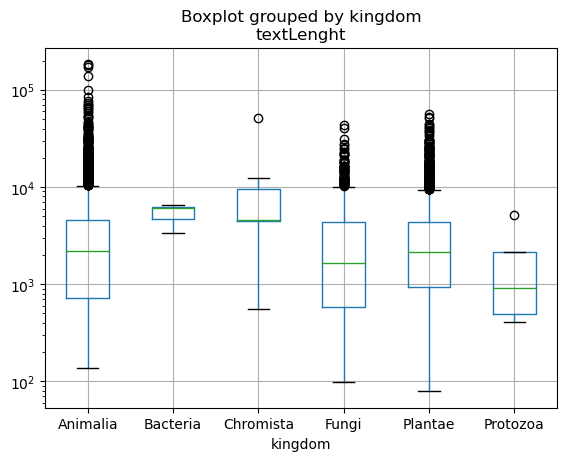

In [8]:
## Textlenght by kingom
ax = speciesData.boxplot(column="textLenght", by="kingdom")
ax.set_yscale("log")

In [9]:
## Total number of observations by kingdom
pd.DataFrame(speciesData.groupby("kingdom")["observationsCount"].sum())

,observationsCount
kingdom,
Animalia,71367
Bacteria,3
Chromista,9
Fungi,5431
Plantae,125970
Protozoa,15


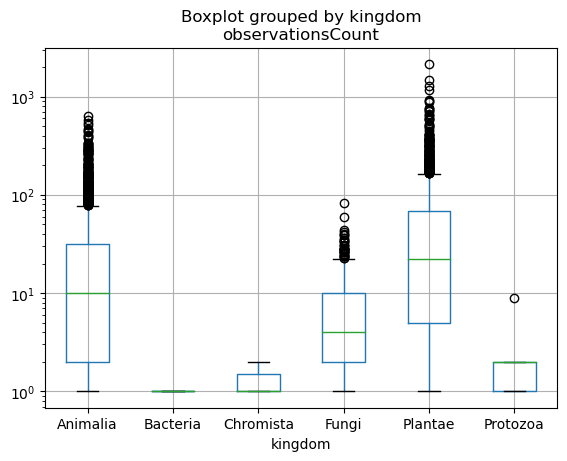

In [10]:
## Species number of observations distribution by kingdom
ax = speciesData.boxplot(column="observationsCount", by="kingdom")
ax.set_yscale("log")

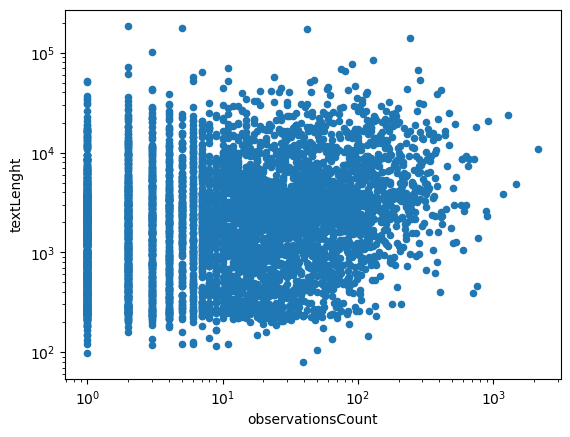

In [11]:
## Text length to observation count relation
ax = speciesData.plot.scatter(x="observationsCount", y="textLenght")
ax.set_yscale("log")
ax.set_xscale("log")

### Compute statistics about zones data

In [12]:
speciesHabitatsRecords = pd.read_json("./processed_data/speciesHabitatsRecords.json", orient="records")
speciesHabitatsRecords.head(10)

,zoneID,gridID,TypoCH_NUM,speciesKey,shapeArea,canton
0,96603,1537,454,2891147,102800.130038,VD
1,95033,1625,625,3170040,57464.263336,VD
2,94466,1713,452,2891147,69785.151723,VD
3,94462,1713,453,5371685,104539.091134,VD
4,94901,1804,625,1703827,36810.089390,VD
5,94842,2071,662,2987999,308874.666368,VD
6,94842,2071,662,2482613,308874.666368,VD
7,94841,2071,453,8324121,409587.557003,VD
8,94841,2071,453,8324121,409587.557003,VD
9,94841,2071,453,2704395,409587.557003,VD


In [13]:
speciesHabitatsRecords.describe()

,zoneID,gridID,TypoCH_NUM,speciesKey,shapeArea
count,1.125272e+06,1.125272e+06,1.125272e+06,1.125272e+06,1.125272e+06
mean,5.569390e+04,3.832494e+03,4.066951e+02,4.237218e+06,2.954285e+05
std,2.907543e+04,2.538464e+03,3.902445e+02,2.195478e+06,9.609041e+05
min,9.000000e+00,3.300000e+01,2.000000e+00,1.012292e+06,8.114492e+00
25%,2.495300e+04,2.019000e+03,4.100000e+01,2.706164e+06,5.720904e+04
50%,6.324500e+04,2.956000e+03,4.510000e+02,3.133702e+06,1.392495e+05
75%,8.379000e+04,6.086000e+03,6.430000e+02,5.376139e+06,2.913742e+05
max,9.811800e+04,1.122900e+04,5.300000e+03,1.215520e+07,3.239941e+08


In [14]:
## Number of species Keys per shape
zones = speciesHabitatsRecords.drop_duplicates().groupby(["zoneID","TypoCH_NUM","shapeArea"])["speciesKey"].count().reset_index()
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesKey
count,22787.000000,22787.000000,2.278700e+04,22787.000000
mean,48494.031290,442.163602,1.314472e+05,8.899592
std,28218.470841,732.487229,2.183925e+06,68.208714
min,9.000000,2.000000,8.114492e+00,1.000000
10%,9658.600000,12.000000,3.617861e+03,1.000000
20%,21022.200000,41.000000,8.015701e+03,1.000000
30%,26733.800000,66.000000,1.453556e+04,1.000000
40%,35618.200000,94.000000,2.454930e+04,1.000000
50%,48877.000000,432.000000,3.869770e+04,2.000000
60%,59375.800000,452.000000,5.890358e+04,3.000000


In [15]:
## Available text lenght per zone and unique species number
subset = speciesData[["speciesKey", "textLenght"]].set_index("speciesKey")
zones = speciesHabitatsRecords.drop_duplicates().join(subset, on="speciesKey", how="inner")
zones = zones.groupby(["zoneID","TypoCH_NUM","shapeArea","canton"]).agg({"speciesKey":"count","textLenght":"sum"}).reset_index()
zones = zones.rename(columns={"speciesKey":"speciesCount"})
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesCount,textLenght
count,22787.000000,22787.000000,2.278700e+04,22787.000000,2.278700e+04
mean,48494.031290,442.163602,1.314472e+05,8.899592,5.714573e+04
std,28218.470841,732.487229,2.183925e+06,68.208714,3.311801e+05
min,9.000000,2.000000,8.114492e+00,1.000000,1.050000e+02
10%,9658.600000,12.000000,3.617861e+03,1.000000,2.126000e+03
20%,21022.200000,41.000000,8.015701e+03,1.000000,3.501000e+03
30%,26733.800000,66.000000,1.453556e+04,1.000000,5.631000e+03
40%,35618.200000,94.000000,2.454930e+04,1.000000,8.656400e+03
50%,48877.000000,432.000000,3.869770e+04,2.000000,1.244000e+04
60%,59375.800000,452.000000,5.890358e+04,3.000000,1.827480e+04


In [16]:
## Visualize outliers
zones.sort_values(by="speciesCount", ascending=False).head(10)

,zoneID,TypoCH_NUM,shapeArea,canton,speciesCount,textLenght
3582,17856,451,28978.166773,VS,1994,8526192
16651,70303,820,425855.702016,VS,1836,8016891
5559,23416,81,81811.681012,VS,1735,8112271
15256,66417,820,145387.093631,VS,1728,7550488
3168,16889,34,80188.607549,VS,1692,7397207
15390,66650,643,175664.843734,VS,1613,6998940
9487,38429,663,969669.815203,VS,1521,6584953
5971,24451,452,97227.559134,VS,1519,7181944
15482,66824,643,57209.036853,VS,1469,6394311
10806,45247,820,478907.099674,VS,1462,7584945


In [17]:
high_IDs = zones[zones["speciesCount"]>100]["zoneID"]
high_IDs

363       1127
455       1507
494       1624
602       1982
921       3470
         ...  
22215    94093
22304    94841
22329    95070
22652    97345
22668    97472
Name: zoneID, Length: 149, dtype: int64

In [18]:
## Number of zones per canton (roughly 80% vs 20%)
zones.canton.value_counts()

VS    18736
VD     4051
Name: canton, dtype: int64

In [19]:
## Number of occurence of habitats
habitatsData = pd.read_json("./WikiSpeciesHabitats/habitatsData.json", orient="records")
subset = pd.DataFrame(zones.TypoCH_NUM.value_counts())
subset.columns = ["occurencesCount"]
habitatsData = habitatsData.join(subset, on="TypoCH_NUM", how="left")
habitatsData = habitatsData.fillna(0)
habitatsData.head(10)

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,occurencesCount
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,0,1,1,1,1,0.0
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,0,1,11,11,1,168.0
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,0,1,12,12,1,488.0
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,0,2,2,2,1,21.0
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,0,2,21,21,1,132.0
5,211,2.1.1 Moortümpelgesellschaft,2.1.1 Dépression inondée à utriculaires,2.1.1 Depressioni allagate con Erba-vescica,Sphagno-Utricularion,2,21,211,1,0.0
6,212,2.1.2 Röhricht,2.1.2 Roselière,2.1.2 Canneti,0,2,21,212,2,0.0
7,2121,2.1.2.1 Stillwasser-Röhricht,2.1.2.1 Roselière lacustre,2.1.2.1 Canneti lacustri,Phragmition,2,21,212,2,0.0
8,2122,2.1.2.2 Flussufer- und Landröhricht,2.1.2.2 Roselière terrestre,"2.1.2.2 Canneti terrestri, ripariali",Phalaridion,2,21,212,2,17.0
9,22,2.2 Flachmoore,2.2 Bas-marais,2.2 Paludi (torbiere basse),0,2,22,22,2,0.0


In [20]:
## At the TypoCH_NUM level
habitatsData.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,TypoCH_NUM,Class,Group_,Type,Source,occurencesCount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,557.794872,5.153846,51.474359,400.128205,3.724359,146.070513
std,888.226669,2.188397,23.863712,293.086483,2.948097,255.823531
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10%,28.000000,2.000000,21.500000,28.000000,1.000000,0.000000
20%,60.000000,3.000000,25.000000,60.000000,2.000000,0.000000
30%,211.500000,4.000000,42.000000,152.500000,2.000000,0.000000
40%,401.000000,5.000000,45.000000,250.000000,2.000000,0.000000
50%,451.500000,5.000000,53.000000,432.500000,3.000000,6.000000
60%,543.000000,6.000000,61.000000,535.000000,3.000000,33.000000


In [21]:
## At the Type level
pd.DataFrame(habitatsData.groupby("Type")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Type,occurencesCount
count,148.000000,148.000000
mean,403.297297,153.966216
std,296.006997,260.352467
min,1.000000,0.000000
10%,24.700000,0.000000
20%,53.400000,0.000000
30%,93.100000,0.000000
40%,251.800000,0.000000
50%,434.500000,13.500000
60%,537.200000,61.800000


In [22]:
## At the Group level
pd.DataFrame(habitatsData.groupby("Group_")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Group_,occurencesCount
count,46.000000,46.000000
mean,42.195652,495.369565
std,27.922607,647.776826
min,1.000000,0.000000
10%,5.500000,0.000000
20%,11.000000,10.000000
30%,23.500000,44.500000
40%,33.000000,200.000000
50%,42.500000,278.000000
60%,51.000000,403.000000


In [23]:
## At the Class level
pd.DataFrame(habitatsData.groupby("Class")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Class,occurencesCount
count,9.000000,9.000000
mean,5.000000,2531.888889
std,2.738613,2664.027001
min,1.000000,485.000000
10%,1.800000,621.800000
20%,2.600000,777.800000
30%,3.400000,880.200000
40%,4.200000,1017.800000
50%,5.000000,1441.000000
60%,5.800000,1997.800000


### See how species distribution differ in different habitats